In [42]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
# Step 2: Read the CSV file

file_path = r"D:\Kuliah\Semester 7\Analitika Data\_uts\content\ecoli.csv"
df = pd.read_csv(file_path, sep=',')

print("=== Cek Nama Kolom ===")
print(df.columns.tolist())
print("\n=== 5 Baris Pertama ===")
print(df.head())

=== Cek Nama Kolom ===
['SEQUENCE_NAME', 'MCG', 'GVH', 'LIP', 'CHG', 'AAC', 'ALM1', 'ALM2', 'SITE']

=== 5 Baris Pertama ===
  SEQUENCE_NAME   MCG   GVH   LIP  CHG   AAC  ALM1  ALM2 SITE
0     AAT_ECOLI  0.49  0.29  0.48  0.5  0.56  0.24  0.35   cp
1    ACEA_ECOLI  0.07  0.40  0.48  0.5  0.54  0.35  0.44   cp
2    ACEK_ECOLI  0.56  0.40  0.48  0.5  0.49  0.37  0.46   cp
3    ACKA_ECOLI  0.59  0.49  0.48  0.5  0.52  0.45  0.36   cp
4     ADI_ECOLI  0.23  0.32  0.48  0.5  0.55  0.25  0.35   cp


In [44]:
# Step 3: Display basic information
print("=== Dataset Overview ===")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}\n")

print("=== Column Names ===")
print(df.columns.tolist(), "\n")

print("=== Data Types and Non-null Counts ===")
print(df.info(), "\n")

print("=== First 5 Rows ===")
print(df.head(), "\n")

# Step 4: Summary statistics for numeric columns
print("=== Summary Statistics (Numeric Columns) ===")
print(df.describe(), "\n")

# Step 5: Check unique values per column (useful for categorical variables)
print("=== Unique Values per Column ===")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

# Step 6: Identify potential target variable
print("\n=== Possible Target Variable ===")
print("The 'SITE' column indicates the protein localization site (e.g., cp, im, om, etc).")
print(df['SITE'].value_counts())

=== Dataset Overview ===
Number of rows: 336
Number of columns: 9

=== Column Names ===
['SEQUENCE_NAME', 'MCG', 'GVH', 'LIP', 'CHG', 'AAC', 'ALM1', 'ALM2', 'SITE'] 

=== Data Types and Non-null Counts ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SEQUENCE_NAME  336 non-null    object 
 1   MCG            336 non-null    float64
 2   GVH            336 non-null    float64
 3   LIP            336 non-null    float64
 4   CHG            336 non-null    float64
 5   AAC            336 non-null    float64
 6   ALM1           336 non-null    float64
 7   ALM2           336 non-null    float64
 8   SITE           336 non-null    object 
dtypes: float64(7), object(2)
memory usage: 23.8+ KB
None 

=== First 5 Rows ===
  SEQUENCE_NAME   MCG   GVH   LIP  CHG   AAC  ALM1  ALM2 SITE
0     AAT_ECOLI  0.49  0.29  0.48  0.5  0.56  0.24  0.35   cp
1

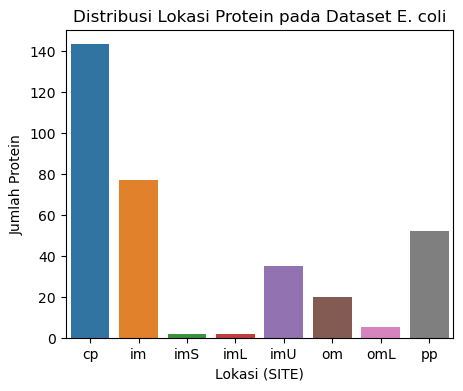

In [45]:
plt.figure(figsize=(5,4))
sns.countplot(x='SITE', data=df)
plt.title("Distribusi Lokasi Protein pada Dataset E. coli")
plt.xlabel("Lokasi (SITE)")
plt.ylabel("Jumlah Protein")
plt.show()

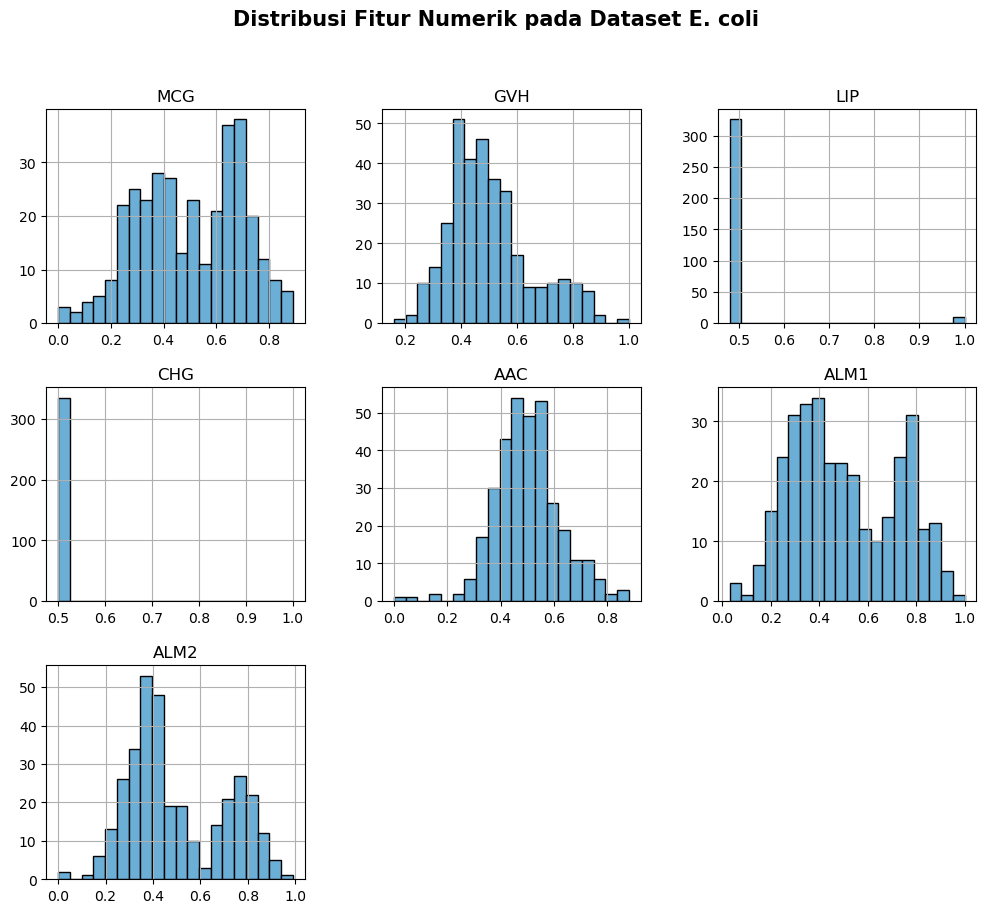

In [46]:
# --- Univariate analysis ---
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Numeric variables distribution
df[numeric_cols].hist(figsize=(12, 10), bins=20, color='#6BAED6', edgecolor='black')
plt.suptitle("Distribusi Fitur Numerik pada Dataset E. coli", fontsize=15, fontweight='bold')
plt.show()


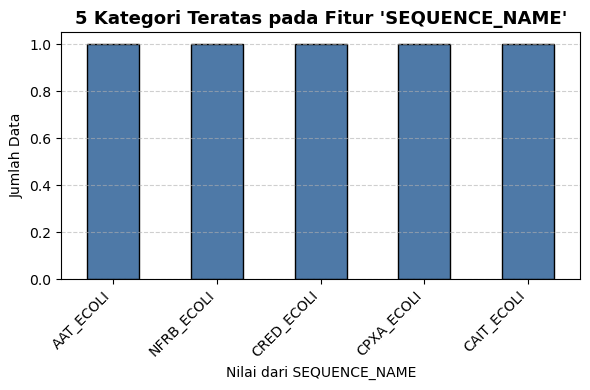

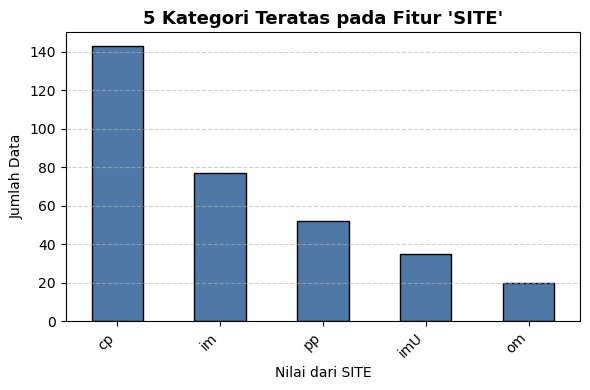

In [47]:
# --- Visualisasi Fitur Kategorikal (Top 5 Tiap Kolom) ---
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().head(5).plot(
        kind='bar',
        color='#4E79A7',
        edgecolor='black'
    )
    plt.title(f"5 Kategori Teratas pada Fitur '{col}'", fontsize=13, fontweight='bold')
    plt.xlabel(f"Nilai dari {col}")
    plt.ylabel("Jumlah Data")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


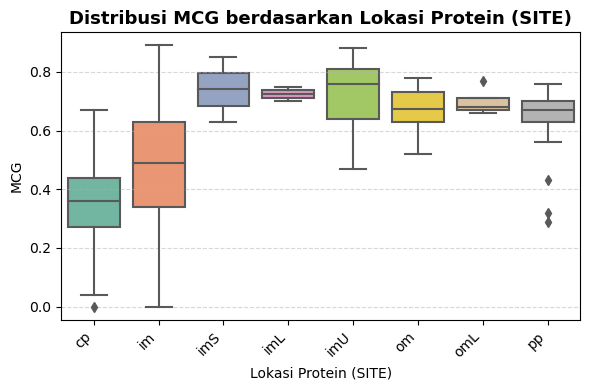

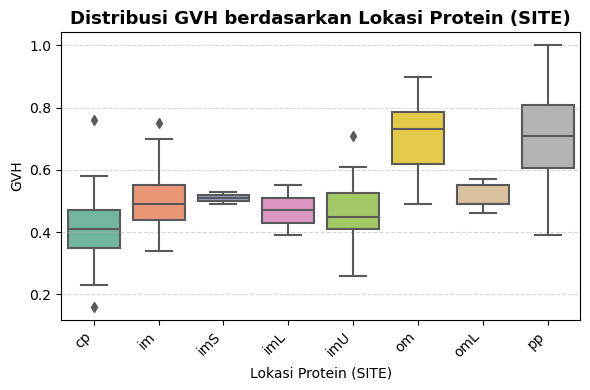

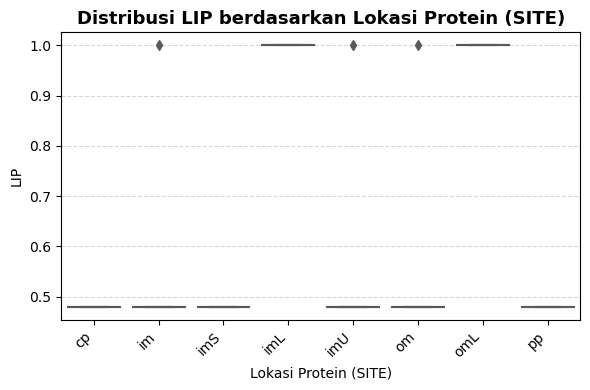

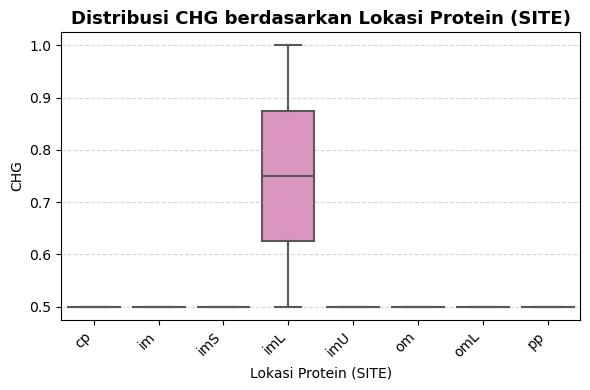

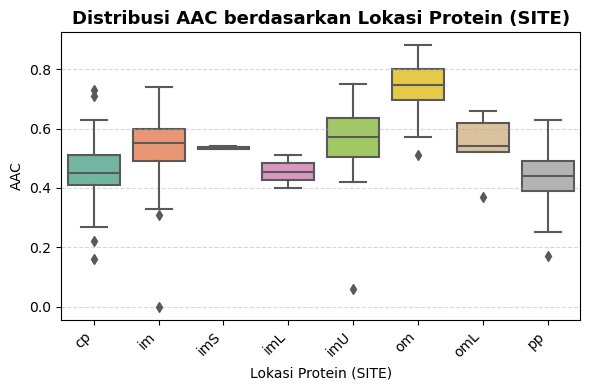

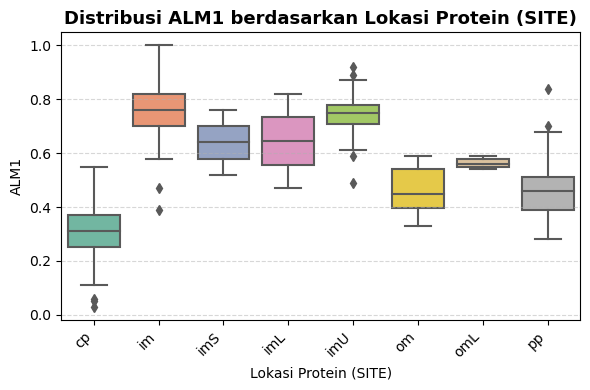

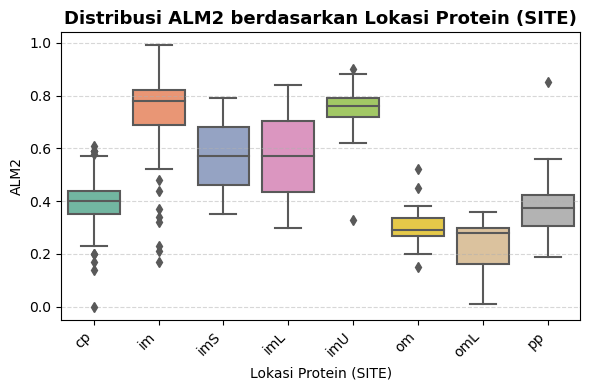

In [48]:
# --- Bivariate Analysis ---
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(
        x='SITE', 
        y=col, 
        data=df, 
        palette='Set2'
    )
    plt.title(f"Distribusi {col} berdasarkan Lokasi Protein (SITE)", fontsize=13, fontweight='bold')
    plt.xlabel("Lokasi Protein (SITE)")
    plt.ylabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


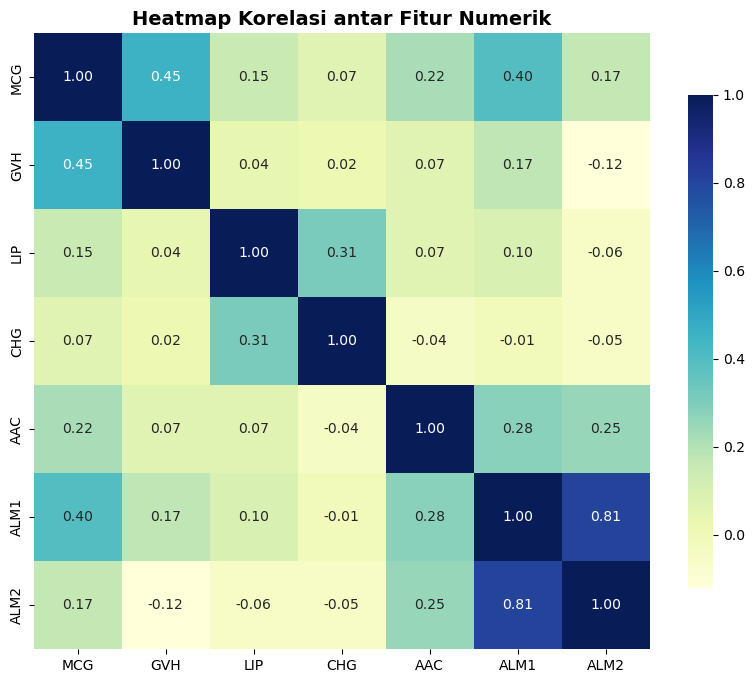

In [56]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns


plt.figure(figsize=(10, 8))
corr = df[numeric_cols].corr()
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    square=True,
    cbar_kws={'shrink': .8}
)
plt.title("Heatmap Korelasi antar Fitur Numerik", fontsize=14, fontweight='bold')
plt.show()



In [57]:
# --- 6. Duplicates and data quality ---
print("\n=== Duplicates ===")
print(df.duplicated().sum())


=== Duplicates ===
0


1.	Hasil univariate analysis✔️
Tampilkan hasil visualisasi univariate analysis untuk tipe data numeric, categorical atau keduanya

2.	Hasil bivariate analysis✔️
Tampilkan hasil visualisasi bivariate analysis untuk tipe data numeric, categorical atau keduanya

3.	Hasil multivariate analysis✔️
Tampilkan hasil visualisasi multivariate analysis untuk tipe data numeric 


jordan rangga - a12.2022.06929